In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Getting dataset and cleaning it

dataset = pd.read_csv('Downloads/pulsar_stars.csv')
dataset = dataset.dropna()
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
#No of columns in the dataset

dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
# Getting X_data

X_data = dataset.iloc[:,0:-1].values
X_data[0:5]

array([[ 1.40562500e+02,  5.56837821e+01, -2.34571412e-01,
        -6.99648398e-01,  3.19983278e+00,  1.91104263e+01,
         7.97553179e+00,  7.42422249e+01],
       [ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02],
       [ 1.03015625e+02,  3.93416494e+01,  3.23328365e-01,
         1.05116443e+00,  3.12123746e+00,  2.17446687e+01,
         7.73582202e+00,  6.31719091e+01],
       [ 1.36750000e+02,  5.71784487e+01, -6.84146380e-02,
        -6.36238369e-01,  3.64297659e+00,  2.09592803e+01,
         6.89649891e+00,  5.35936607e+01],
       [ 8.87265625e+01,  4.06722254e+01,  6.00866079e-01,
         1.12349169e+00,  1.17892977e+00,  1.14687196e+01,
         1.42695728e+01,  2.52567306e+02]])

In [5]:
# scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [6]:
X_data[0:5]

array([[ 1.14931702,  1.33483164, -0.66956953, -0.400459  , -0.31944026,
        -0.37062547, -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, -0.37053549, -0.37110188,
        -0.5889241 ,  0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, -0.11659286, -0.32210703,
        -0.23532816, -0.12599609, -0.39137346],
       [ 1.0006944 ,  1.55325441, -0.51340862, -0.39017809, -0.3044042 ,
        -0.27566649, -0.31226539, -0.4813003 ],
       [-0.87140244, -0.85887881,  0.11560871, -0.10486616, -0.38801036,
        -0.76311112,  1.32402614,  1.38679399]])

In [7]:
# Getting Y_data

Y_data = dataset.iloc[:,-1].values
Y_data[0:5]

array([0, 0, 0, 0, 0])

In [8]:
# printing no of instances of each unique variable in target_class
# Column

unique , counts = np.unique(Y_data,return_counts=True)
print(unique,counts)

[0 1] [16259  1639]


In [9]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
classifier.score(x_train,y_train)

0.6848315696407854

In [13]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x_test,y_test,cv=5)
print(results)

[0.73373102 0.64989739 0.67022233 0.6825926  0.65302403]


In best case scenario we get a accuracy score of 73%

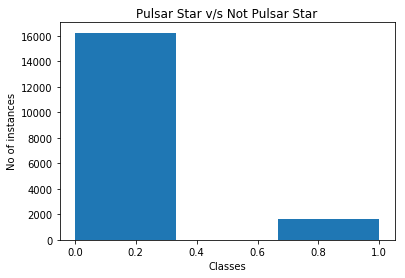

In [14]:
plt.hist(Y_data,bins=3)
plt.title('Pulsar Star v/s Not Pulsar Star')
plt.ylabel('No of instances')
plt.xlabel('Classes')
plt.show()